In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

In [57]:
def Cnk(n, k):
    if k == 0 or k == n:
        return 1
    else:
        return Cnk(n - 1, k - 1) * n / k

In [58]:
np.random.seed(0)

In [59]:
q = 2
T = 1e-6 #T = 1 мкс (микросекунда)
f0 = 40e6  # 40 МГц (мегагерц)
dtf = 1 / T
Ns = 50
A = 1
dt = 1 / (Ns * f0)

In [60]:
t = np.arange(0, T, dt)
f = np.zeros(q)
s = np.zeros((q, len(t)))
f1 = np.zeros((q, len(t)))
f2 = np.zeros((q, len(t)))
a = np.zeros((q, len(t)))
sina = np.zeros((q, len(t)))
cosa = np.zeros((q, len(t)))

In [61]:
for i in range(q):
    f[i] = f0 + (i - 1) * dtf
    s[i, :] = A * np.cos(2 * np.pi * f[i] * t)
    f1[i, :] = np.sqrt(2 / T) * np.cos(2 * np.pi * f[i] * t)
    f2[i, :] = np.sqrt(2 / T) * np.sin(2 * np.pi * f[i] * t)
    a[i, :] = 2 * np.pi * f[i] * t
    sina[i, :] = np.sin(a[i])
    cosa[i, :] = np.cos(a[i])

In [62]:
E = np.linalg.norm(s[0, :]) ** 2
max_value = 0
index_max = 0
Nerrmax = 50
num_tests = 30000
SNRdb = np.arange(1, 11)
Pe = np.zeros(len(SNRdb))
Pe_teor = np.zeros(len(SNRdb))

In [63]:
e = 0
m = np.sqrt(e / 2)
sigm = np.sqrt((1 - e) / 2)

In [64]:
for ns in range(len(SNRdb)):
    SNR = 10 ** (SNRdb[ns] / 10)
    N0 = E / SNR
    sigma = np.sqrt(N0 / 2)
    Nerr = 0
    Ntest = 0
    Pe_t = 0
    for j in range(1, q):
        Pe_t += comb(q-1, j) * ((-1) ** (j + 1)) * (1/(1+j+j*(1-e)*E/N0)) * np.exp(-(j*e*E/N0)/(1+j+j*(1-e)*E/N0))
    last_test = Ntest

    
    while Nerr < Nerrmax:
        i = np.random.randint(0, q)
        x = np.random.normal(m, sigm)
        y = np.random.normal(m, sigm)
        m_ = np.sqrt(x ** 2 + y ** 2)
        
        b = 2 * np.pi * np.random.rand()
        j = cosa[i]*np.cos(b) - sina[i]*np.sin(b)
        r = m_ * A * j + sigma * np.random.randn(len(t))
        
        rci = np.zeros(q)
        rsi = np.zeros(q)
        ni = np.zeros(q)
        
        for j in range(q):
            rci[j] = np.dot(r, f1[j, :])
            rsi[j] = np.dot(r, f2[j, :])
            ni[j] = (rci[j] ** 2) + (rsi[j] ** 2)
        
        max_value = np.max(ni)
        index_max = np.argmax(ni)
        
        if index_max != i:
            Nerr += 1
            # print(f"{index_max} != {i}")
            # print(f"SNRdb = {SNRdb[ns]} | {Nerr} Nerr | {Ntest} Ntest")
        
        Ntest += 1
        
        if Ntest - last_test > num_tests:
            # print(f"> {num_tests} tests")
            # print("Pe ~= 0")
            break
    
    Pe[ns] = Nerr / Ntest
    Pe_teor[ns] = Pe_t
    print(f"Pe {Pe[ns]}")

Pe 0.28735632183908044
Pe 0.24752475247524752
Pe 0.24390243902439024
Pe 0.18796992481203006
Pe 0.2824858757062147
Pe 0.15060240963855423
Pe 0.14084507042253522
Pe 0.13736263736263737
Pe 0.07936507936507936
Pe 0.07836990595611286


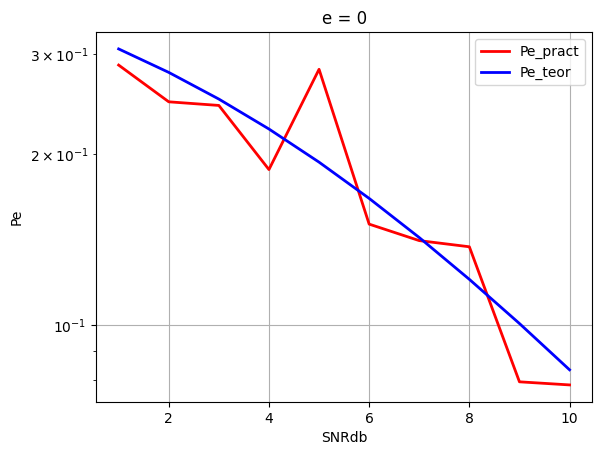

In [65]:
plt.figure(1)
plt.semilogy(SNRdb, Pe, 'r', label='Pe_pract', linewidth=2)
plt.semilogy(SNRdb, Pe_teor, 'b', label='Pe_teor', linewidth=2)
plt.title('e = {}'.format(e))
plt.xlabel('SNRdb')
plt.ylabel('Pe')
plt.legend()
plt.grid(True)
plt.show()